# Installation des packages

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install numpy==1.21.0 --quiet
!pip install pandas==1.5.2 --quiet
!pip install plotly==5.11.0 --quiet
!pip install scikit-learn==1.2.0 --quiet
!pip install scikit-optimize==0.9.0 --quiet
!pip install statsmodels==0.13.5 --quiet
!pip install category_encoders==2.5.1 --quiet
!pip install xgboost==1.7.2 --quiet
!pip install projectpro --upgrade --quiet
!pip install nbformat==5.7.1 --quiet
!pip install matplotlib==3.6.2 --quiet

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
import projectpro
projectpro.checkpoint('1e808c')

In [63]:
sys.path.append('mon_package/')
from EDA import plot_histograms, plot_univariate_numeric, plot_univariate_categorical, \
plot_heatmap, plot_paired_boxplots, plot_paired_scatterplots, plot_residuals, plot_pearson_wrt_target
from TestsStatistiques import chi2, anova
from EvaluationDeModèle import calc_model_performance, compare_model_performance, calc_preds_in_residual_range, calc_preds_in_residual_perc_range

# **Analyse exploitoire de données**

In [8]:
data = pd.read_csv('data.csv')

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
X = data.drop('charges', axis=1)
y = data['charges']

In [13]:
X.shape, y.shape

((1338, 6), (1338,))

## Distributions des variables

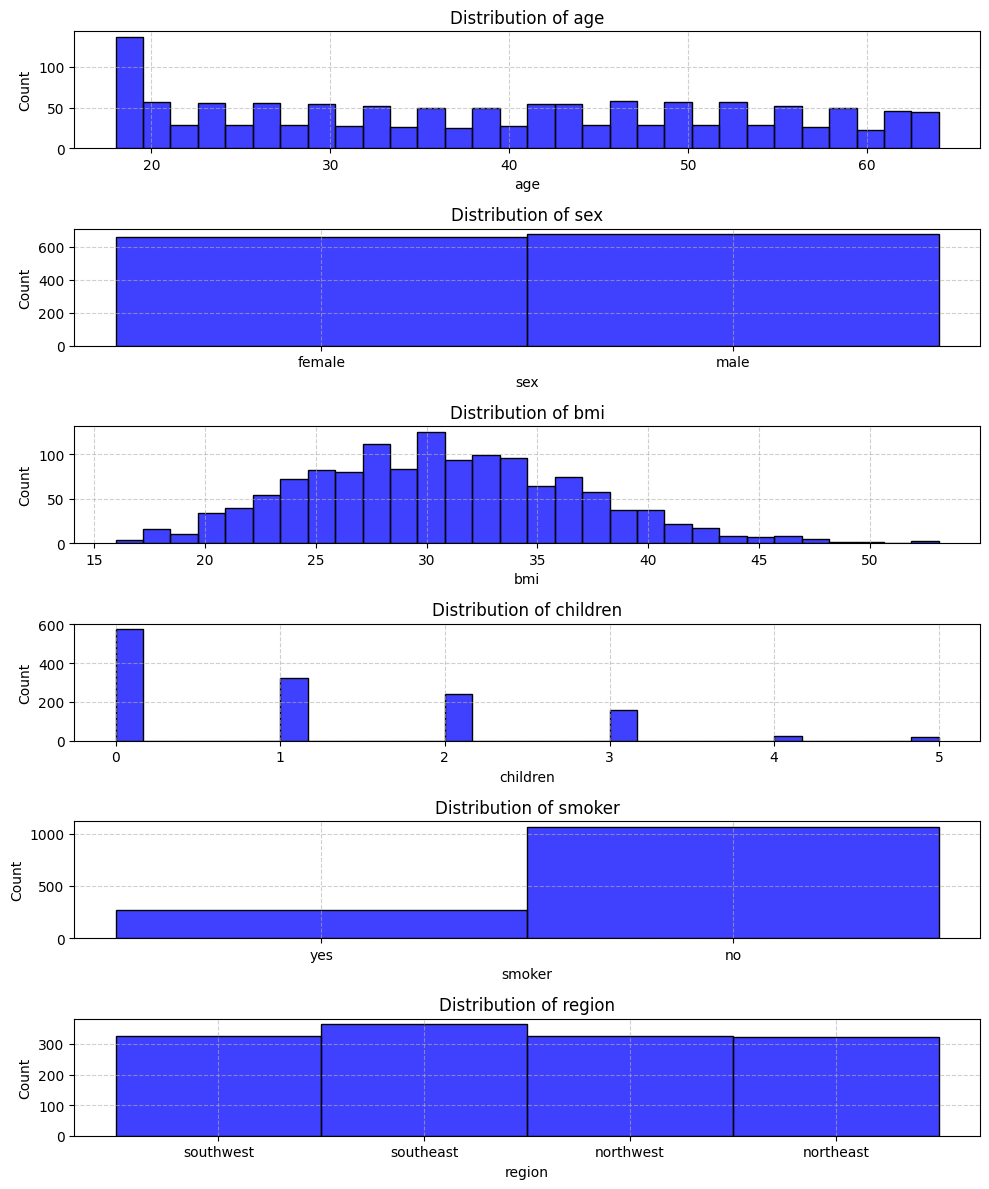

In [15]:
plot_histograms(X)

* `age` - Approximativement uniformément distribué.
* `sex` - Volume approximativement égal dans chaque catégorie.
* `bmi` -  Approximativement distribué normalement.
* `children` - Asymétrie à droite.
* `smoker` - Dominance  dans la catégorie no par rapport à la catégorie yes.
* `region` - Approximativement égal dans chaque catégorie

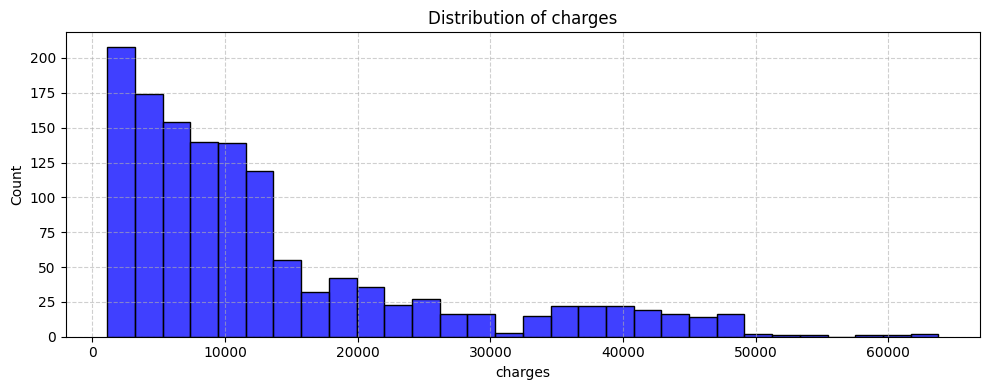

In [26]:
plot_histograms(pd.DataFrame(y), height=400)

## Analyse univariée des variables explicatives  par rapports à la variable cible

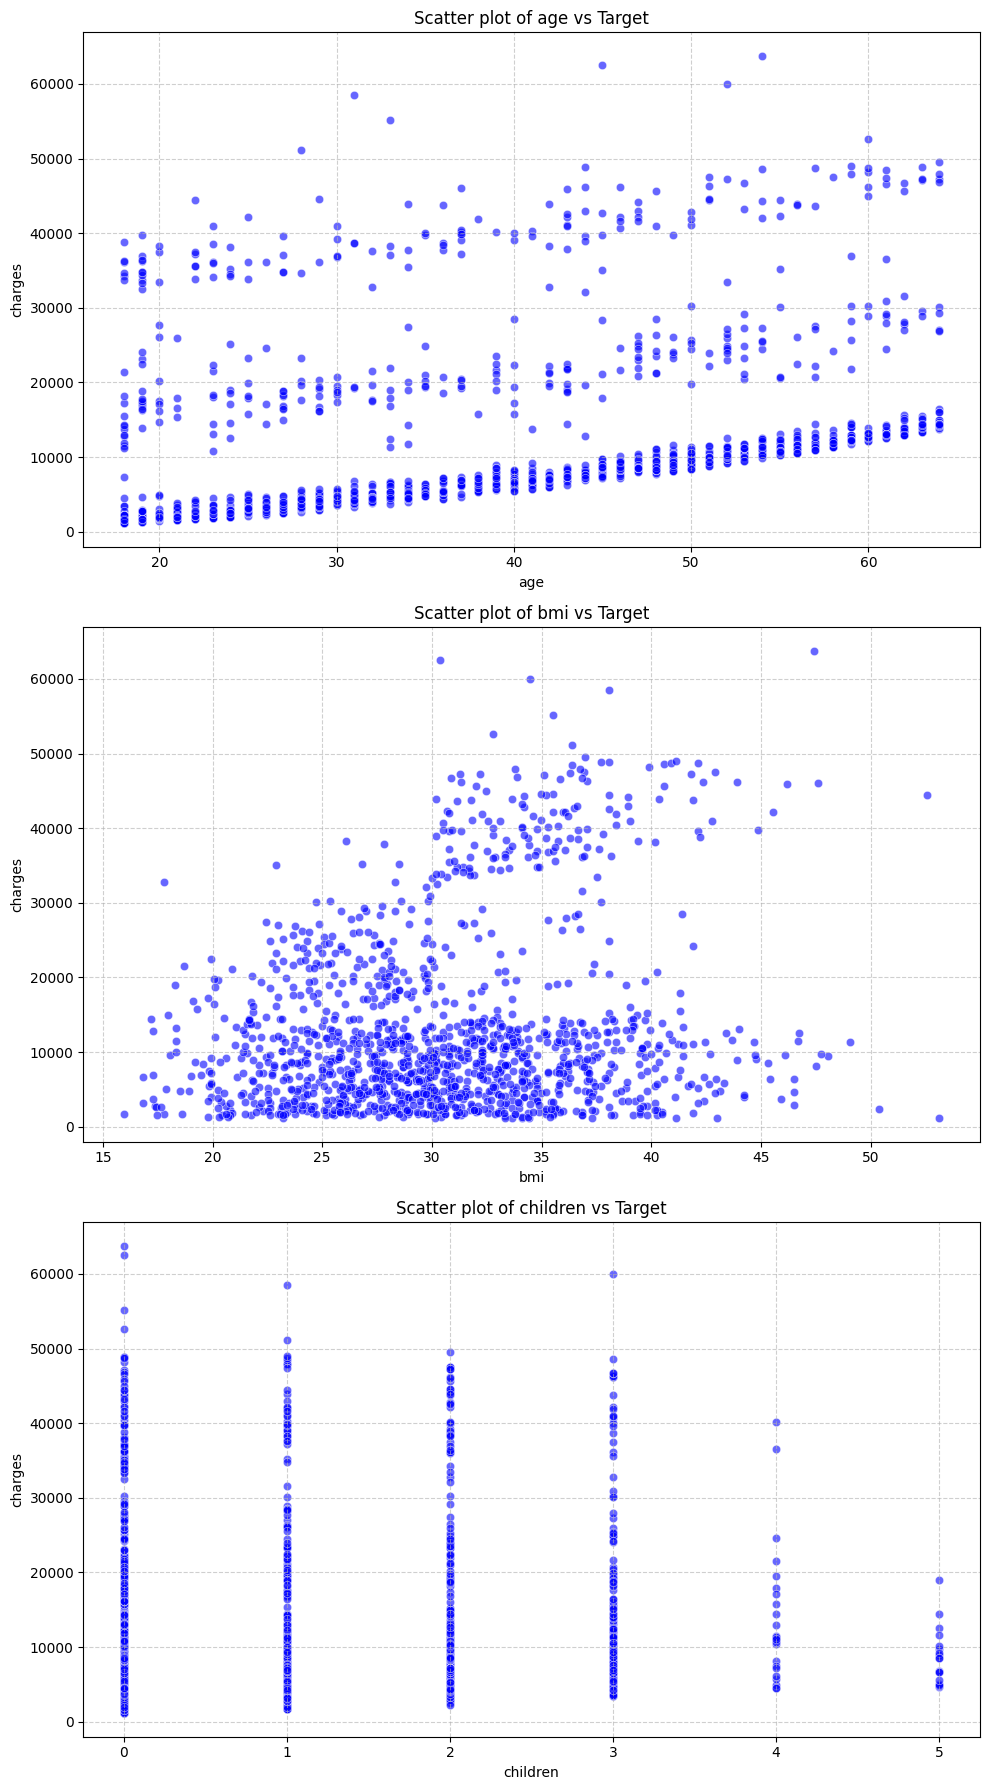

In [27]:
# Les variables numériques
plot_univariate_numeric(X.select_dtypes(include=np.number), y)

* `age` - Tant que `age` augmente, également `charges` augmente
* `bmi` - Aucune relation claire
* `children` - Aucune relation claire

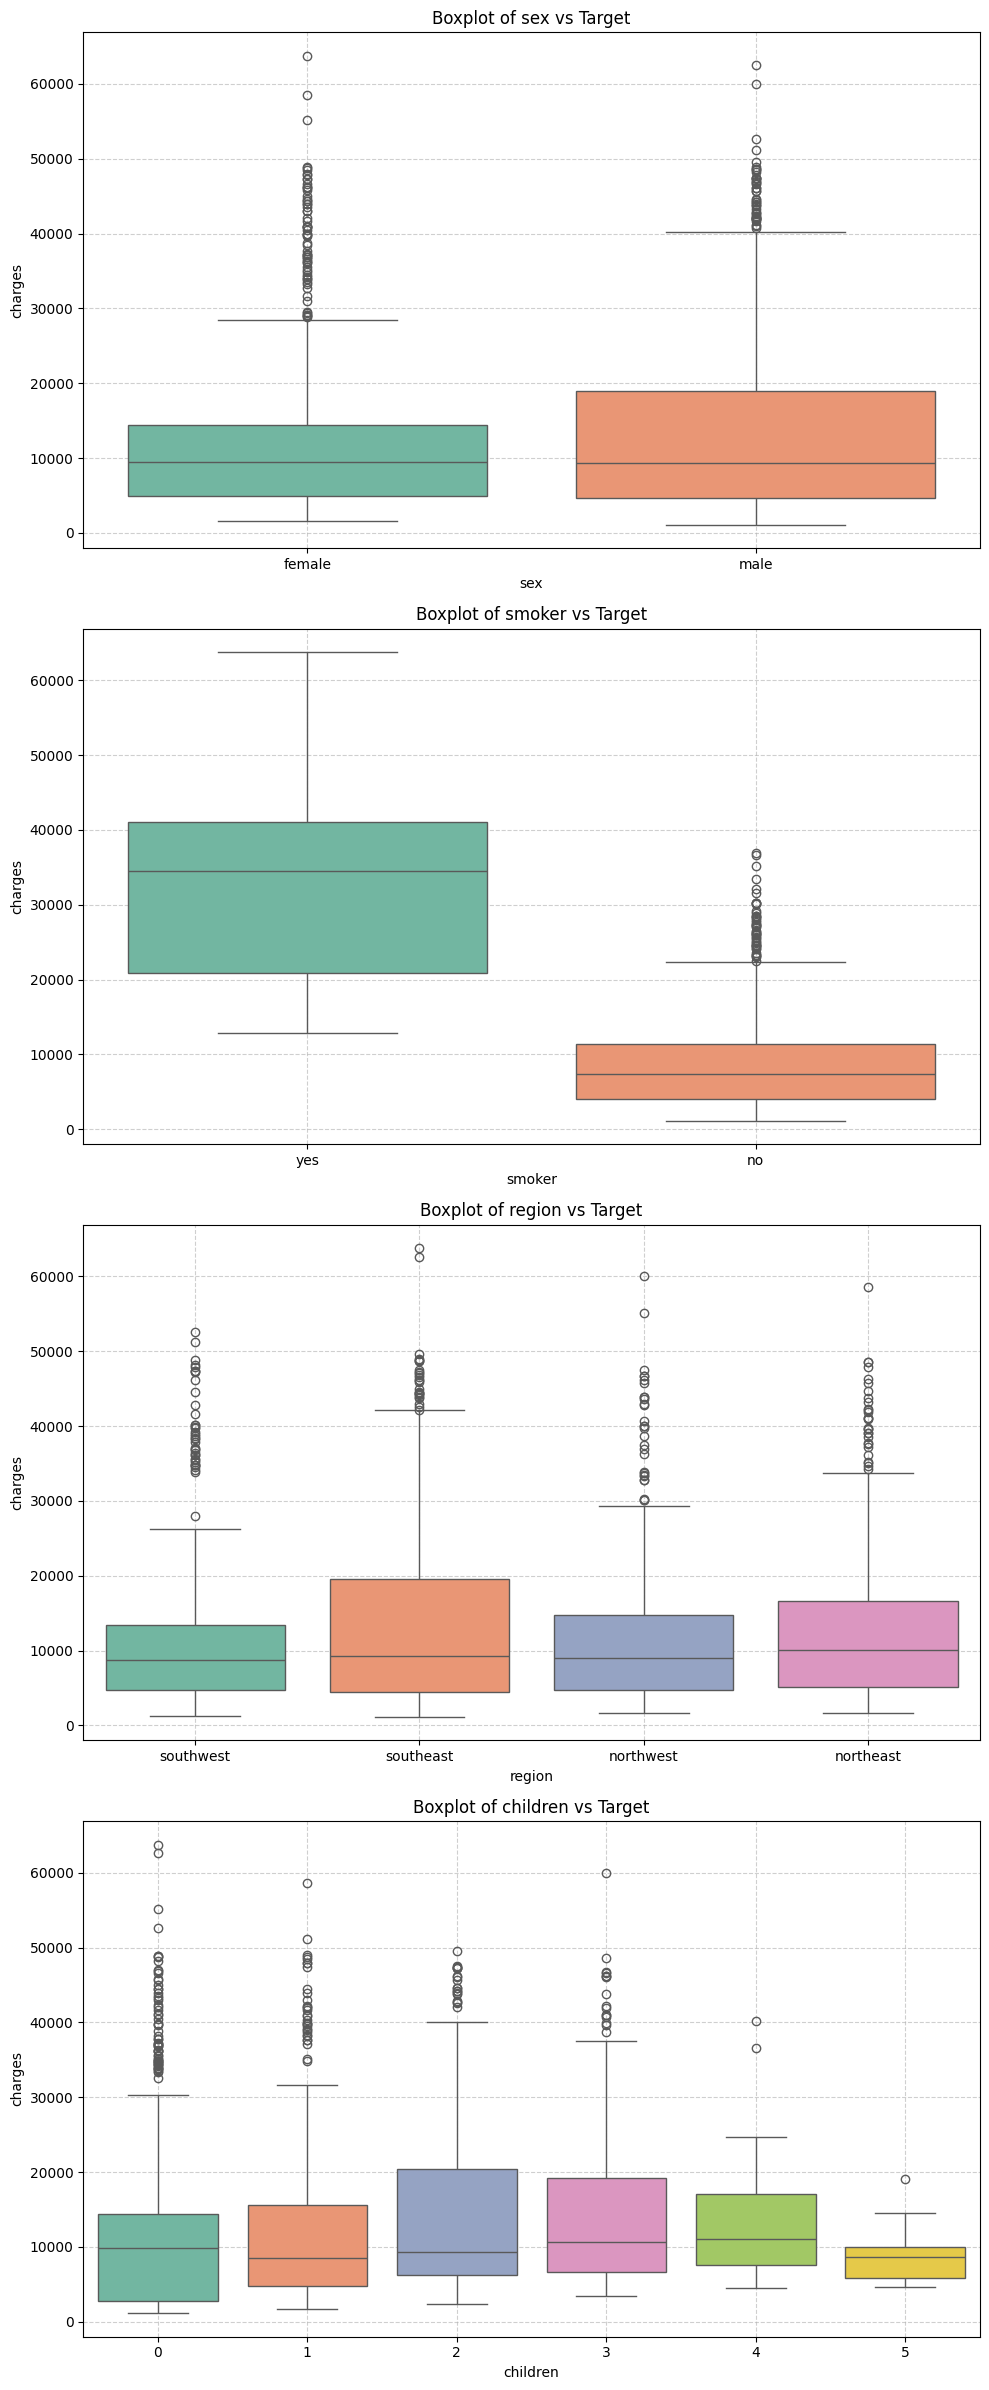

In [28]:
# variables catégorielles
plot_univariate_categorical(X[['sex','smoker','region','children']],y)

* `sex` - Pas de différences significatives de `charges` entre les catégories.
* `smoker` - Les `charges` pour `smoker` == 'yes' sont  plus élevées que  `smoker` == 'no'.
* `region` - Pas de différences significatives de `charges` entre les catégories.
* `children` - Pas de différences significatives de `charges` entre les catégories

## Analyse bivariée des variables explicatives  par rapports à la variable cible

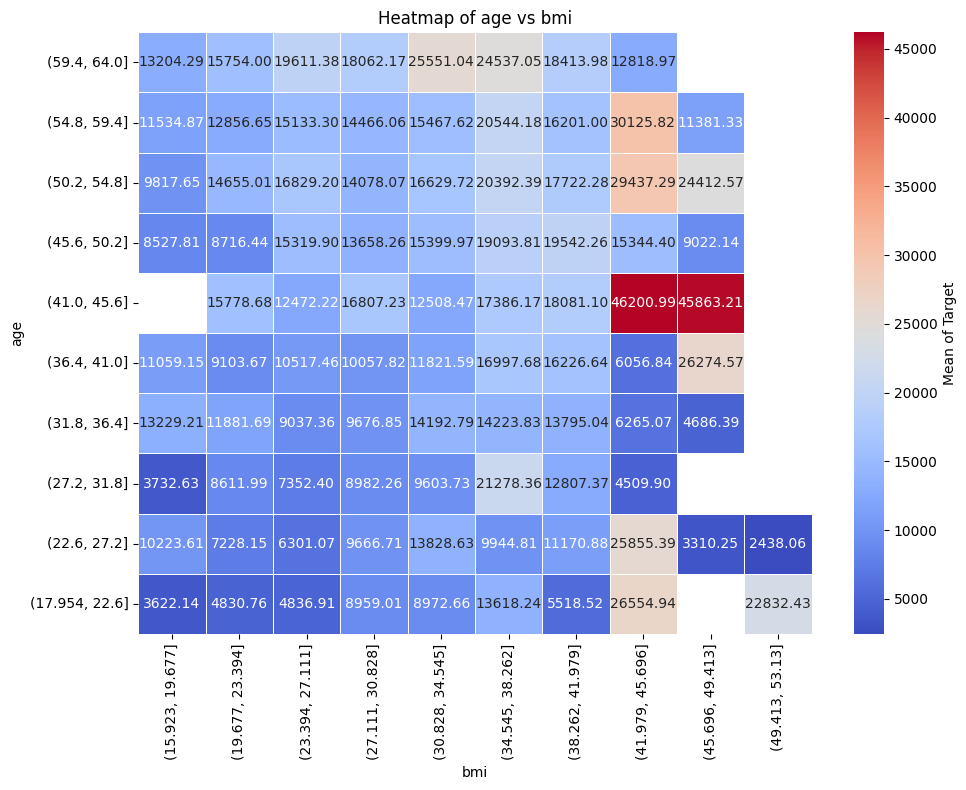

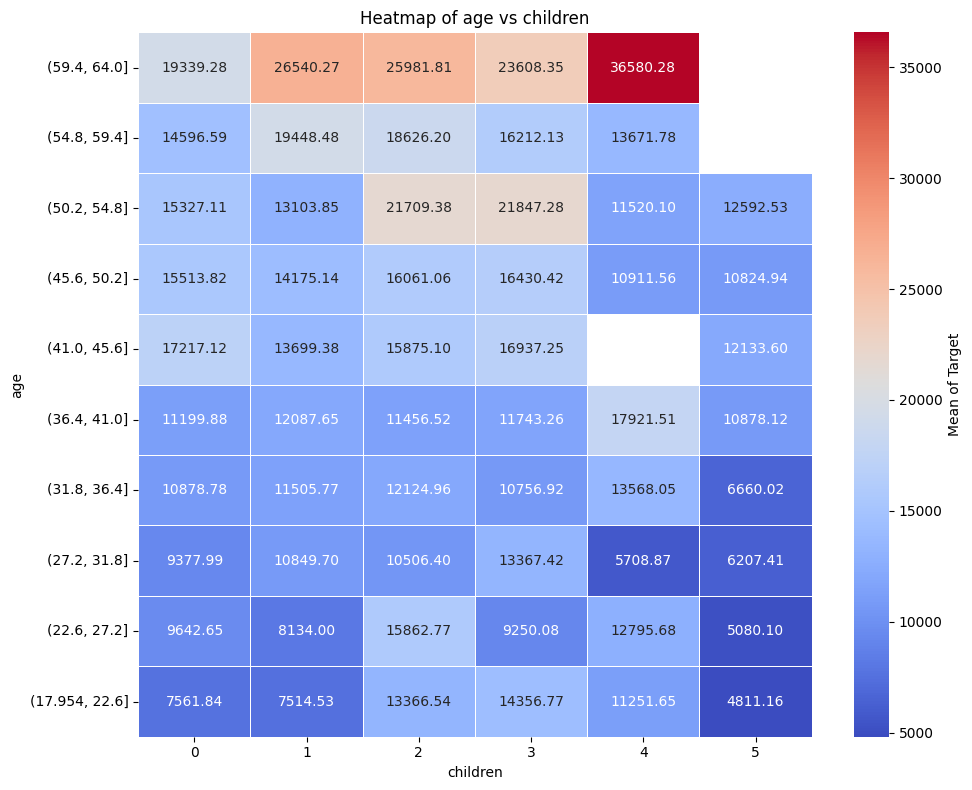

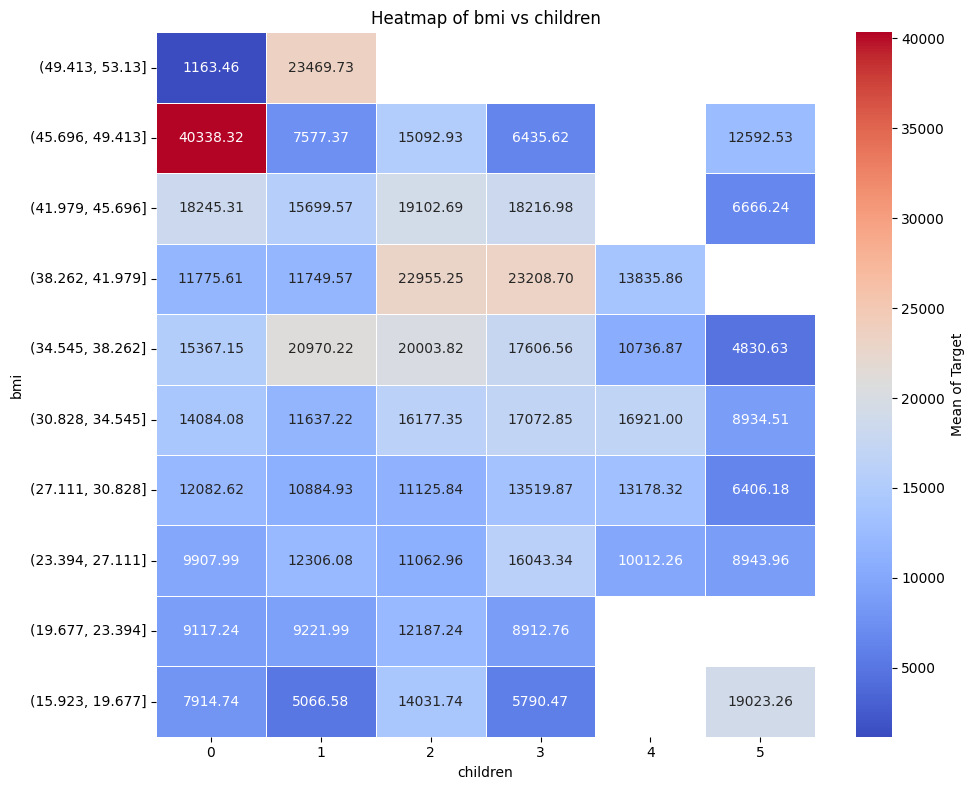

In [46]:
# les variables numériques 
plot_heatmap(X[['age','bmi','children']],y, bins=10)

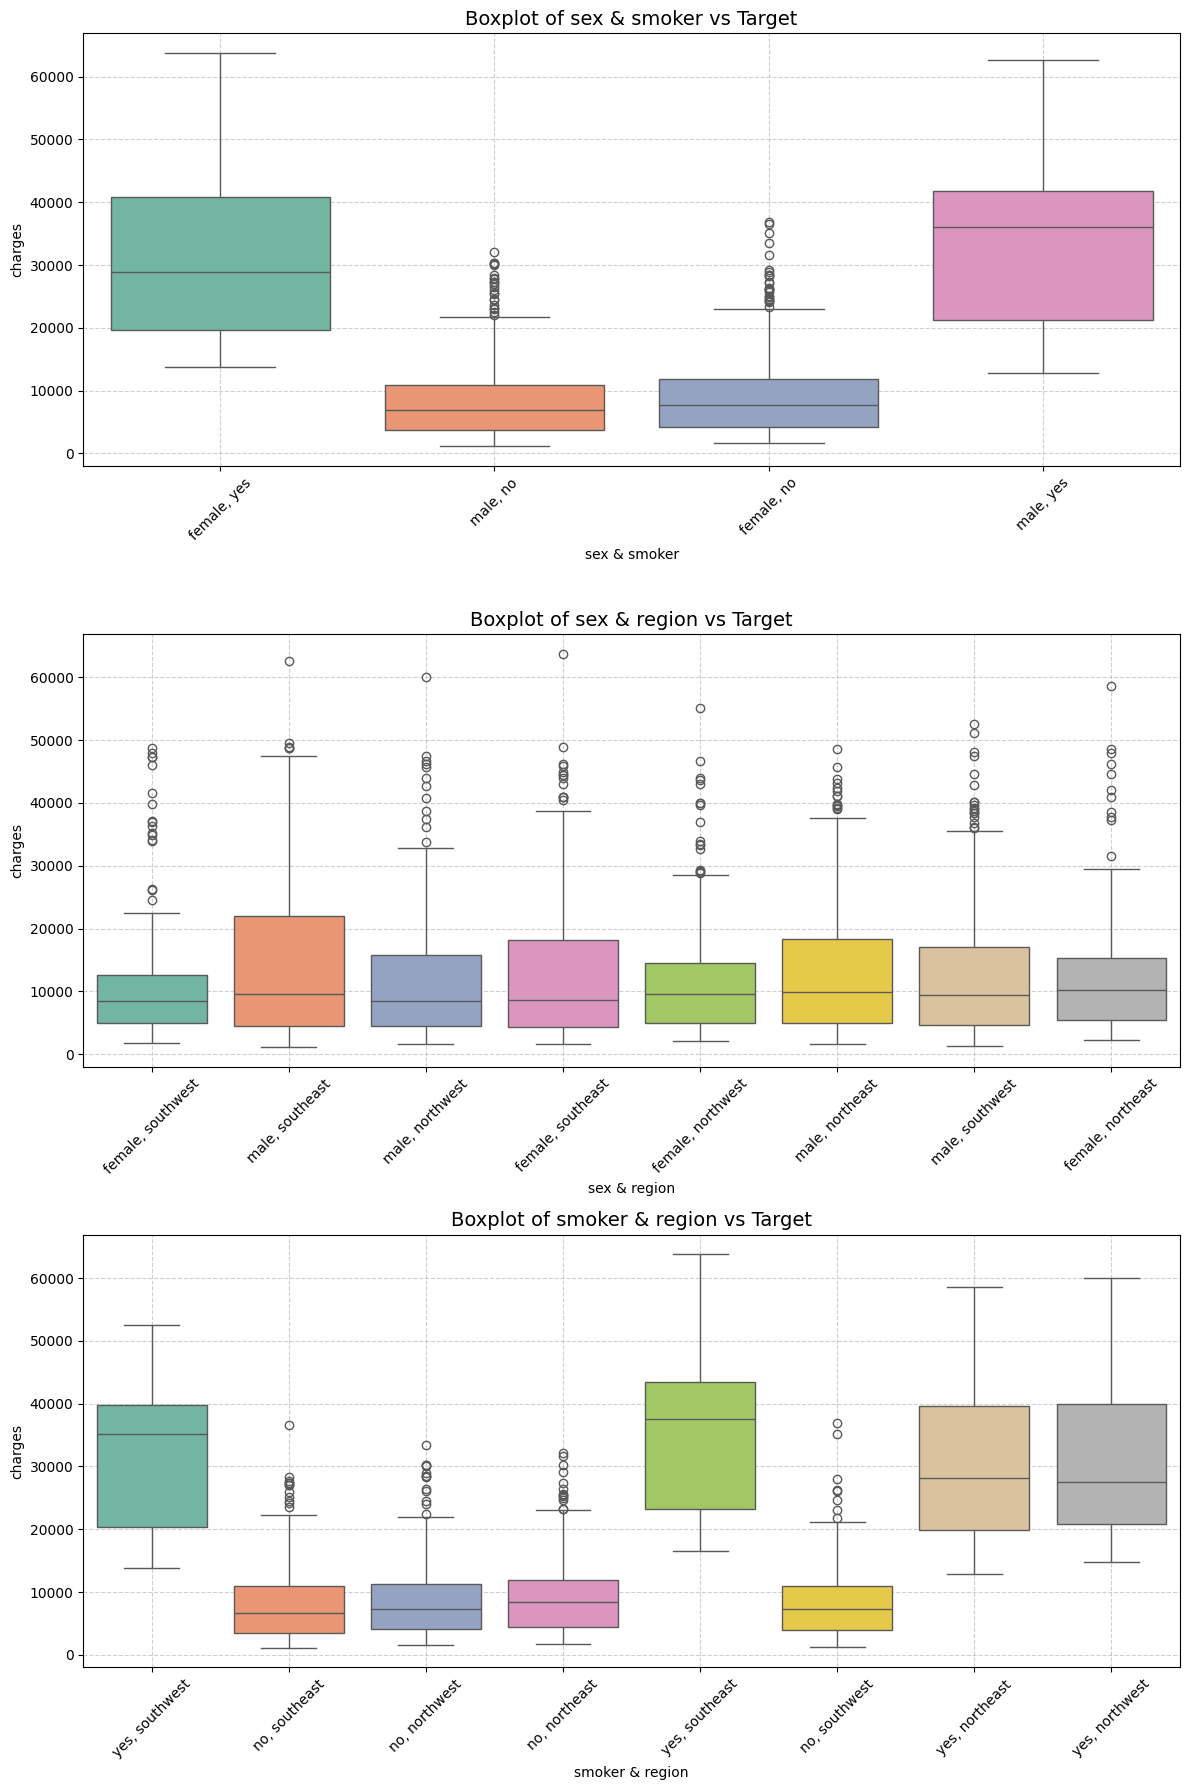

In [47]:
# variables catégorielles 
plot_paired_boxplots(X[['sex','smoker','region']],y)

* `sex-smoker` - La médiane des `charges` est plus élevée pour les hommes fumeurs que pour les femmes fumeuses (36k vs 29k).
* `smoker-region` - La médiane des ``charges`` est plus élevée pour les fumeurs dans le sud-ouest et le sud-est par rapport au nord-est et au nord-ouest (35k et 37k vs 28k et 27k).

In [71]:
# variables numérique-catégorielles
plot_paired_scatterplots(X,y)

NameError: name 'pd' is not defined